<a href="https://colab.research.google.com/github/IndujaSuresh/Deep-learning/blob/main/deep_cv_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import glob
from skimage import io
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/new1'

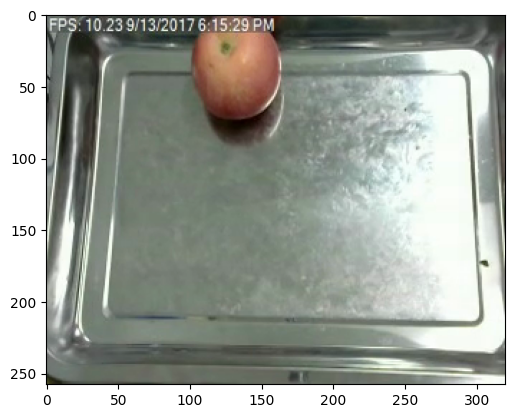

In [ ]:
q_cls = ['Quadrant1', 'Quadrant2','Quadrant3','Quadrant4']
q_path = os.path.join(path, q_cls[1], '*')
q_path = glob.glob(q_path)
image = io.imread(q_path[2])
plt.imshow(image)
plt.show()

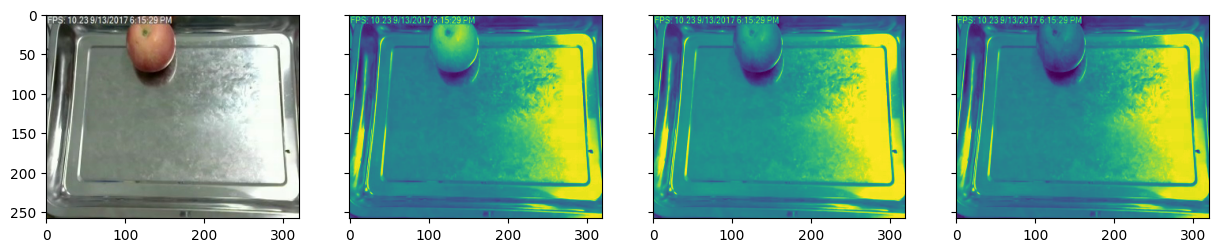

In [ ]:
#Preprocessing

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(image)
ax2.imshow(image[:, : , 0]) #Red
ax3.imshow(image[:, : , 1]) #Green
ax4.imshow(image[:, : , 2]) #Blue


In [ ]:
def get_features(img):
    
    return list(cv2.mean(img)[:-1])

In [ ]:
# Load the images and labels
X = []
y = []
data=[]

for quadrant in range(4):
    quadrant_path = os.path.join(path, f'Quadrant{quadrant+1}')
    for img_file in os.listdir(quadrant_path):
        img_path = os.path.join(quadrant_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        features=get_features(img)
        features.append(f'Quadrant{quadrant+1}')
        data.append(features)
        X.append(img)
        y.append(quadrant)

# Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)
print(data)

[[133.62560000000002, 142.5172, 137.1677, 'Quadrant1'], [132.82760000000002, 142.05280000000002, 136.7241, 'Quadrant1'], [134.18890000000002, 143.43380000000002, 138.24450000000002, 'Quadrant1'], [137.0274, 146.185, 140.8124, 'Quadrant1'], [137.751, 146.7504, 142.67950000000002, 'Quadrant1'], [135.2999, 144.2675, 140.25, 'Quadrant1'], [125.72760000000001, 134.77270000000001, 131.7835, 'Quadrant1'], [134.7127, 142.85930000000002, 139.0745, 'Quadrant1'], [135.04940000000002, 143.42860000000002, 139.6215, 'Quadrant1'], [134.3006, 143.39600000000002, 139.0487, 'Quadrant1'], [126.38510000000001, 135.28640000000001, 131.0488, 'Quadrant1'], [128.949, 137.7632, 133.7807, 'Quadrant1'], [129.22230000000002, 138.2782, 134.1722, 'Quadrant1'], [130.5823, 139.3084, 135.5111, 'Quadrant1'], [132.4949, 141.4657, 137.4058, 'Quadrant1'], [128.74540000000002, 137.5191, 133.4617, 'Quadrant1'], [125.62920000000001, 134.92010000000002, 130.9085, 'Quadrant1'], [128.8693, 137.6353, 133.55360000000002, 'Quadran

In [ ]:
df = pd.DataFrame(data, columns=['R','G','B','class'])
print(df)
df.to_csv('curdata.csv',index=False)

            R         G         B      class
0    133.6256  142.5172  137.1677  Quadrant1
1    132.8276  142.0528  136.7241  Quadrant1
2    134.1889  143.4338  138.2445  Quadrant1
3    137.0274  146.1850  140.8124  Quadrant1
4    137.7510  146.7504  142.6795  Quadrant1
..        ...       ...       ...        ...
464  133.7224  145.9492  138.3597  Quadrant4
465  132.5500  144.0639  136.7019  Quadrant4
466  125.3628  128.9392  119.0832  Quadrant4
467  114.4275  124.3690  119.6436  Quadrant4
468  123.5230  125.7672  115.2691  Quadrant4

[469 rows x 4 columns]


In [ ]:
df = pd.read_csv('curdata.csv')

aX = df[df['class']=='Quadrant1']
bX = df[df['class']=='Quadrant2']
cX = df[df['class']=='Quadrant3']
dX = df[df['class']=='Quadrant4']

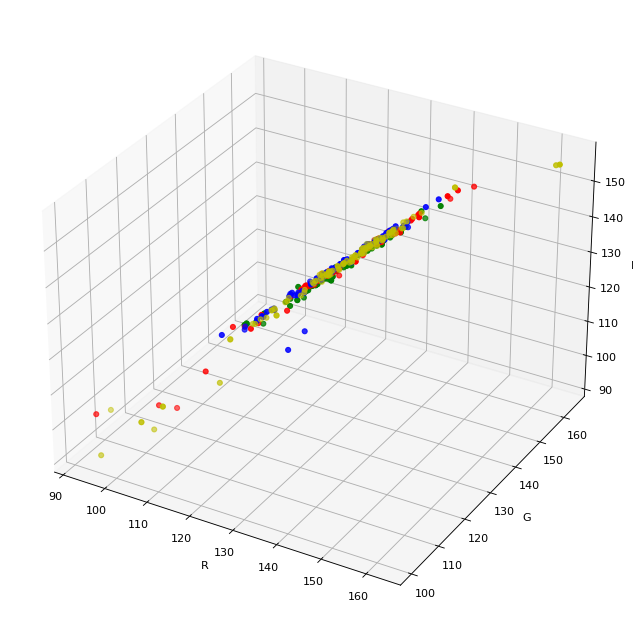

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(aX['R'], aX['G'], aX['B'],color='y')
ax.scatter3D(bX['R'], bX['G'], bX['B'],color='g')
ax.scatter3D(cX['R'], cX['G'], cX['B'],color='r')
ax.scatter3D(dX['R'], dX['G'], dX['B'],color='b')
#there is a outlier in the graph

In [ ]:
print(X)

[[[[105 115 108]
   [108 116 109]
   [109 113 106]
   ...
   [ 43  47  43]
   [ 33  40  38]
   [ 27  37  40]]

  [[114 116 110]
   [207 209 203]
   [158 163 156]
   ...
   [ 44  47  45]
   [ 34  41  40]
   [ 28  37  41]]

  [[112 113 107]
   [192 195 189]
   [134 138 131]
   ...
   [ 45  47  46]
   [ 34  40  41]
   [ 32  40  44]]

  ...

  [[ 73  81  74]
   [109 118 111]
   [111 118 109]
   ...
   [159 168 165]
   [137 149 145]
   [123 135 130]]

  [[ 23  45  40]
   [ 38  53  49]
   [ 83  91  88]
   ...
   [243 254 250]
   [244 254 250]
   [241 251 248]]

  [[ 33  67  61]
   [ 20  41  37]
   [ 17  30  26]
   ...
   [244 254 251]
   [244 254 251]
   [227 239 234]]]


 [[[111 114 107]
   [112 115 108]
   [112 116 111]
   ...
   [ 39  43  42]
   [ 34  40  41]
   [ 37  47  47]]

  [[115 118 110]
   [200 205 197]
   [158 163 157]
   ...
   [ 39  42  43]
   [ 35  43  44]
   [ 33  44  45]]

  [[107 111 104]
   [192 192 186]
   [132 136 130]
   ...
   [ 37  42  43]
   [ 34  44  46]
   [ 37  46

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the CNN model
model = keras.Sequential([
    # Convolutional layer 1
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output of the convolutional layers
    layers.Flatten(),
    
    # Fully connected (dense) layer 1
    layers.Dense(units=128, activation='relu'),
    
    # Fully connected (dense) layer 2
    layers.Dense(units=4, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 33856)             0         
                                                                 
 dense_30 (Dense)            (None, 128)             

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))


Epoch 1/20
12/12 [==============================] - 8s 566ms/step - loss: 279.8628 - accuracy: 0.2720 - val_loss: 16.8535 - val_accuracy: 0.4149
Epoch 2/20
12/12 [==============================] - 8s 626ms/step - loss: 1.9483 - accuracy: 0.8293 - val_loss: 0.0622 - val_accuracy: 0.9894
Epoch 3/20
12/12 [==============================] - 6s 521ms/step - loss: 0.0584 - accuracy: 0.9893 - val_loss: 0.0624 - val_accuracy: 0.9681
Epoch 4/20
12/12 [==============================] - 8s 679ms/step - loss: 0.0425 - accuracy: 0.9840 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 5/20
12/12 [==============================] - 6s 528ms/step - loss: 0.0309 - accuracy: 0.9893 - val_loss: 0.0199 - val_accuracy: 0.9894
Epoch 6/20
12/12 [==============================] - 8s 691ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 6s 501ms/step - loss: 0.0262 - accuracy: 0.9973 - val_loss: 0.0221 - val_accuracy: 0.9894
Epo

3/3 - 0s - loss: 0.0578 - accuracy: 0.9894 - 409ms/epoch - 136ms/step


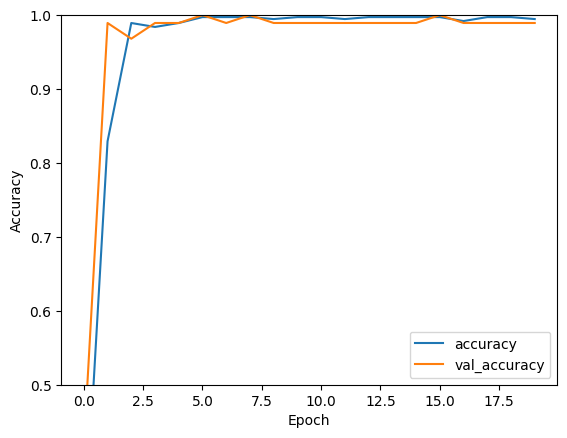

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

0.9893617033958435


Enter image path : /content/drive/MyDrive/new1/Quadrant3/Apple 227.png
1/1 [==============================] - 0s 81ms/step
The apple is in the bottom-left quadrant


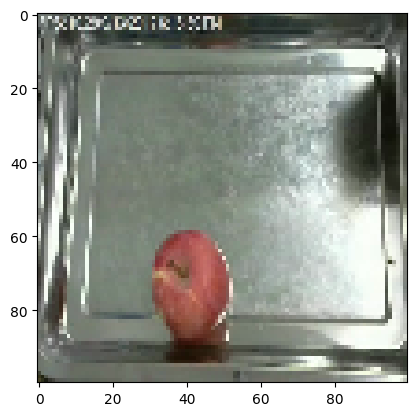

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img_path =input("Enter image path : ")
img = load_img(img_path, target_size=(100, 100))

# Convert the image to a numpy array
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction on the input image
prediction = model.predict(img_array)

# Get the predicted class label
class_label = np.argmax(prediction)

# Print the predicted class label
if class_label == 0:
    print("The apple is in the top-right quadrant")
elif class_label == 1:
    print("The apple is in the top-left quadrant")
elif class_label == 2:
    print("The apple is in the bottom-left quadrant")
else:
    print("The apple is in the bottom-right quadrant")


plt.imshow(img)
plt.show()
